In [13]:
# -*- coding:utf-8 -*-
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random
import cv2
import os

orignal =[]

In [14]:
#Read all test videos
test=[]
f= 'sample_images_RA'
Test_videos =[]
test_list = open('Labels/test.txt','r')
for line in test_list:
    name = line.split(" ")[0]
    x=line.split(" ")[-1]
    test.append(x[0])
    Test_videos.append(f+"/"+name)

In [15]:
for i in test:
    if i=='0':
        orignal.append('normal')
    else:
        orignal.append('abnormal')

In [16]:
#To load pre-trained model, trained on 5 classes 
#model = tf.keras.models.load_model('Trained Models/model_P3D.h5',compile=False)


#To load pre-trained weights,
model = tf.keras.models.load_model('Trained Models/weights_model_Q3D.hdf5',compile=False)

In [17]:
#two classes labels
labels0 ={0:'normal', 1:'abnormal'}
prediction = []

In [25]:
#Read Patch image
wm = cv2.imread("patch 3.jpg")
wm = cv2.resize(wm, (25, 25))
wm =cv2.cvtColor(wm, cv2.COLOR_BGR2RGB)

In [27]:
import os
import cv2
import numpy as np

# Assuming you have defined 'Test_videos', 'wm', 'labels0', and 'model' elsewhere in your code

prediction = []

for video in Test_videos:
    vid = []
    nor = 0
    abnor = 0
    path = video
    images = os.listdir(video)
    
    for img in images:
        img_path = os.path.join(path, img)
        img2 = cv2.imread(img_path)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        img2 = cv2.resize(img2, (112, 112))
        
        # Extracting the central 25x25 patch
        middle_patch = img2[43:68, 43:68]  # Adjust the indices based on your image size
        
        result = cv2.addWeighted(middle_patch, 1, wm, 1, 0)
        img2[43:68, 43:68] = result
        vid.append(img2)
    
    vid = np.array(vid, dtype=np.float32)
    length = len(vid)
    
    for i in range(0, len(vid), 32):
        if abnor == 3:
            break
        if i + 32 <= length:
            X = vid[i:i + 32].transpose((1, 2, 0, 3))
            output = model.predict_on_batch(np.array([X]))
            
            if len(output) > 0:
                str1 = labels0[np.argmax(output)]
                
                if str1 == 'abnormal':
                    abnor += 1
                else:
                    abnor = 0
    
    vid = []
    
    if abnor == 3:
        prediction.append('abnormal')
    else:
        prediction.append('normal')

# Now 'prediction' contains the predictions for each video


In [27]:
import os
import cv2
import numpy as np

# Assuming you have defined 'Test_videos', 'wm', 'labels0', and 'model' elsewhere in your code

prediction = []

for video in Test_videos:
    vid = []
    nor = 0
    abnor = 0
    path = video
    images = os.listdir(video)
    
    for img in images:
        img_path = os.path.join(path, img)
        img2 = cv2.imread(img_path)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        img2 = cv2.resize(img2, (112, 112))
        
        # Extracting the central 25x25 patch
        middle_patch = img2[43:68, 43:68]  # Adjust the indices based on your image size
        
        result = cv2.addWeighted(middle_patch, 1, wm, 1, 0)
        img2[43:68, 43:68] = result
        vid.append(img2)
    
    vid = np.array(vid, dtype=np.float32)
    length = len(vid)
    
    for i in range(0, len(vid), 32):
        if abnor == 3:
            break
        if i + 32 <= length:
            X = vid[i:i + 32].transpose((1, 2, 0, 3))
            output = model.predict_on_batch(np.array([X]))
            
            if len(output) > 0:
                str1 = labels0[np.argmax(output)]
                
                if str1 == 'abnormal':
                    abnor += 1
                else:
                    abnor = 0
    
    vid = []
    
    if abnor == 3:
        prediction.append('abnormal')
    else:
        prediction.append('normal')

# Now 'prediction' contains the predictions for each video


In [28]:
len(prediction)

16

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [30]:
j=0
for i in Test_videos:
    print(i, orignal[j], prediction[j])
    j=j+1

sample_images_RA/0Normal/1Fighting037_x264 normal abnormal
sample_images_RA/0Normal/1Fighting038_x264 normal normal
sample_images_RA/0Normal/1Fighting039_x264 normal abnormal
sample_images_RA/0Normal/1Shooting002_x264 normal abnormal
sample_images_RA/0Normal/1Shooting003_x264 normal abnormal
sample_images_RA/0Normal/1Shooting004_x264 normal abnormal
sample_images_RA/0Normal/1Vandalism019_x264 normal abnormal
sample_images_RA/0Normal/1Vandalism020_x264 normal abnormal
sample_images_RA/fighting/2Fighting015_x264 abnormal abnormal
sample_images_RA/fighting/2Fighting016_x264 abnormal abnormal
sample_images_RA/shooting/2Shooting038_x264 abnormal abnormal
sample_images_RA/shooting/2Shooting053_x264 abnormal abnormal
sample_images_RA/shooting/2Shooting054_x264 abnormal abnormal
sample_images_RA/vandalism/2Vandalism036_x264 abnormal abnormal
sample_images_RA/vandalism/2Vandalism037_x264 abnormal abnormal
sample_images_RA/vandalism/2Vandalism038_x264 abnormal abnormal


<AxesSubplot:>

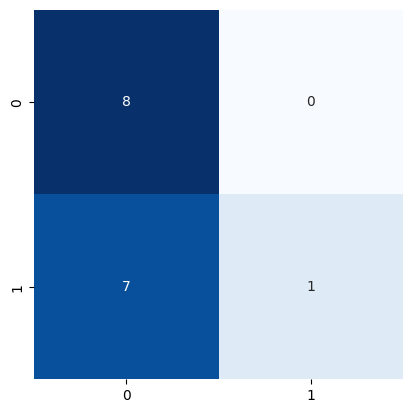

In [31]:
conf_mat = confusion_matrix(orignal, prediction)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)